# <center>Week 3: Logistic regression on Banking Dataset</center>
| **Course:** | **Instructor:** | **Full Name:**| **Student ID:** |**Date:**  |**Term**|
| ----------- | -------------- | ---------------| ----------------|-------    |---------|
| ALY6020     | Prof. Chinthaka Pathum Dinesh Herath Gedara  | Abhilash Dikshit| 002702209       |Jan 27, 2024|Winter |



In [36]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [31]:
# Load the dataset from Excel
path = '~/GitProjects/Datasets/marketing_campaign.xlsx'

# Read data from Excel file into a DataFrame
df = pd.read_excel(path)

# Enter the name of the sheet you want to read, or use the index (e.g., 1 for the second sheet)
sheet_name = 'Sheet1'

# Read data from the specified sheet into a DataFrame
df = pd.read_excel(path, sheet_name=sheet_name)

# Display the DataFrame
display(df)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [32]:
# Preprocess the data
# Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Extract relevant features
features = ['Year_Birth', 'Kidhome', 'Teenhome', 'Income', 'MntWines', 'NumWebVisitsMonth', 'Recency']
X = df[features]

# Target variable
y = df['Response']

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [38]:
# Logistic Regression Model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

In [39]:
# Support Vector Machine (SVM) Model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)



In [40]:
# Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
    
    print(f"Metrics for {model_name} Model:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Confusion Matrix:")
    print(confusion_mat)

# Evaluate Logistic Regression Model
evaluate_model(y_test, y_pred_logistic, "Logistic Regression")

# Evaluate SVM Model
evaluate_model(y_test, y_pred_svm, "SVM")

Metrics for Logistic Regression Model:
Accuracy: 0.8482
Precision: 0.5263
Recall: 0.1449
Confusion Matrix:
[[370   9]
 [ 59  10]]
Metrics for SVM Model:
Accuracy: 0.8594
Precision: 0.6364
Recall: 0.2029
Confusion Matrix:
[[371   8]
 [ 55  14]]


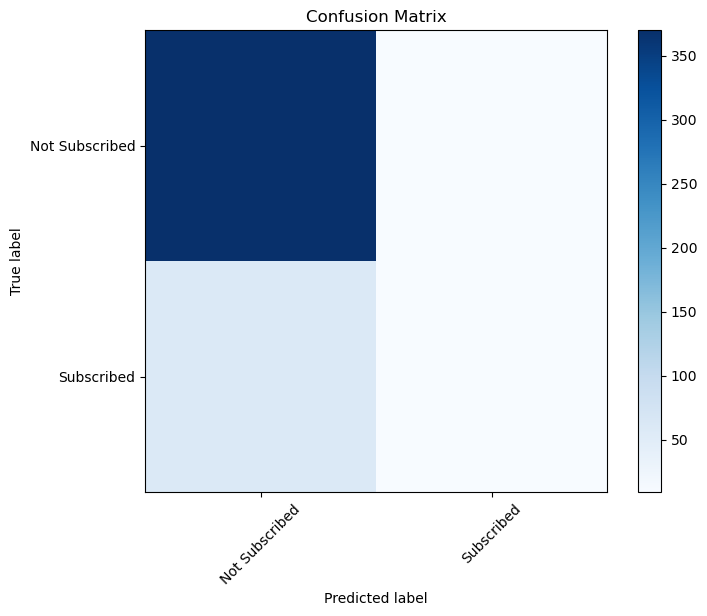

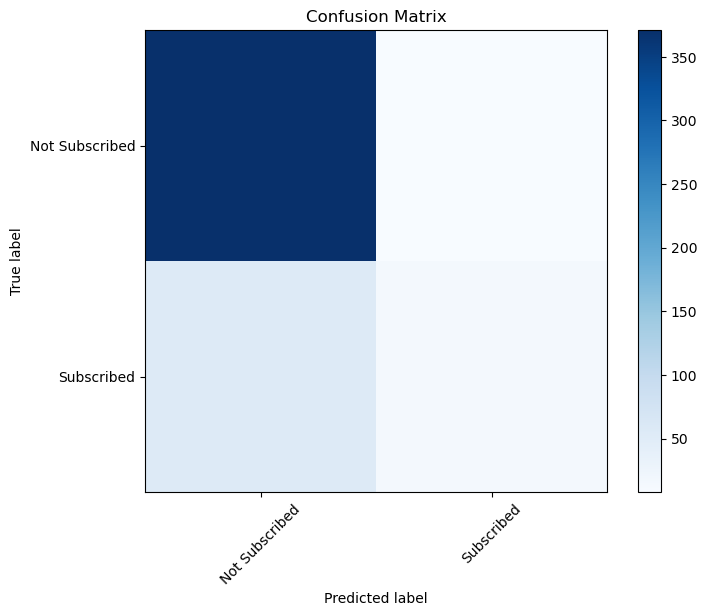

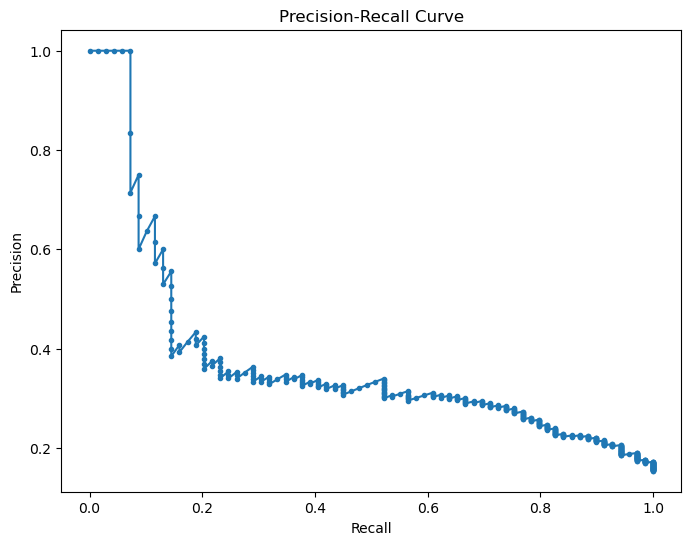

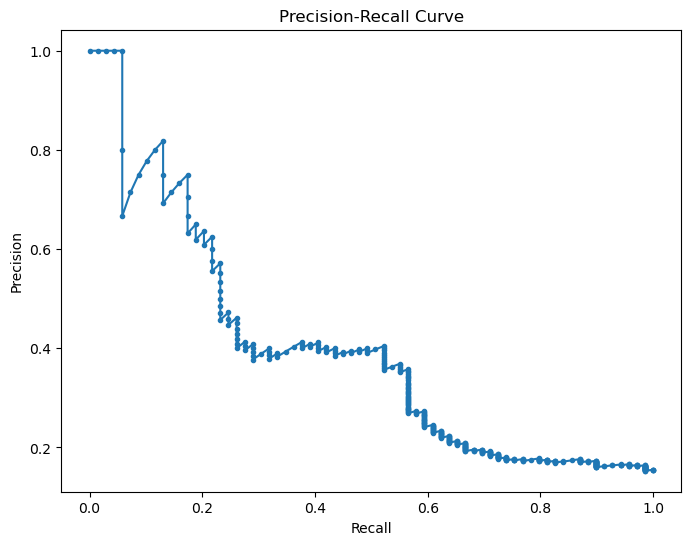

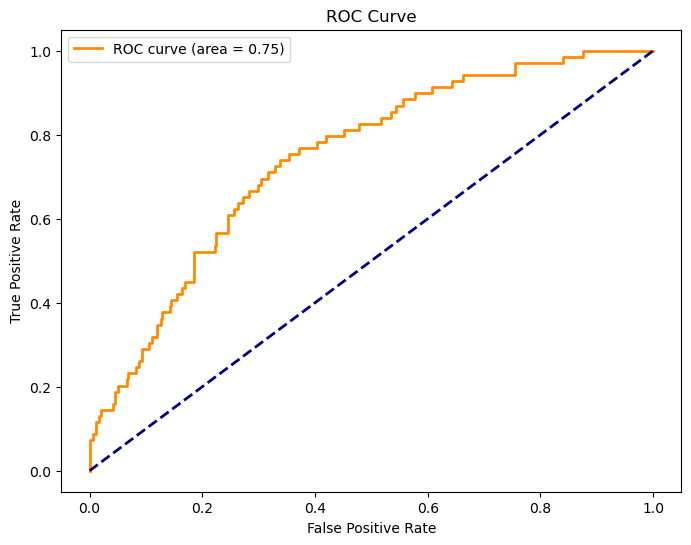

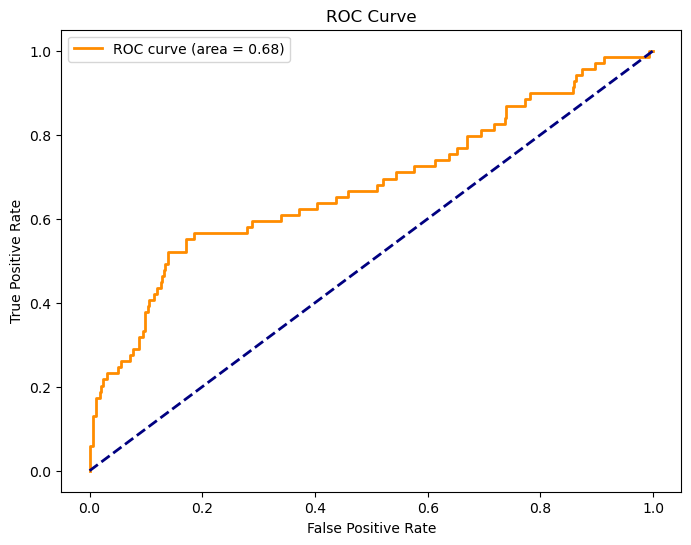

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Confusion Matrix Heatmap
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = range(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_probs):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

# ROC Curve
def plot_roc_curve(y_true, y_probs):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Plot Confusion Matrix for Logistic Regression
plot_confusion_matrix(confusion_matrix(y_test, y_pred_logistic), ['Not Subscribed', 'Subscribed'])

# Plot Confusion Matrix for SVM
plot_confusion_matrix(confusion_matrix(y_test, y_pred_svm), ['Not Subscribed', 'Subscribed'])

# Plot Precision-Recall Curve for Logistic Regression
y_probs_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]
plot_precision_recall_curve(y_test, y_probs_logistic)

# Plot Precision-Recall Curve for SVM
y_probs_svm = svm_model.decision_function(X_test_scaled)
plot_precision_recall_curve(y_test, y_probs_svm)

# Plot ROC Curve for Logistic Regression
plot_roc_curve(y_test, y_probs_logistic)

# Plot ROC Curve for SVM
plot_roc_curve(y_test, y_probs_svm)


## Compare the Models

Let's analyze the key metrics for both models:

**Logistic Regression:**
- Accuracy: 0.8482
- Precision: 0.5263
- Recall: 0.1449

**SVM:**
- Accuracy: 0.8594
- Precision: 0.6364
- Recall: 0.2029

**Analysis:**
- **Accuracy:** Both models have similar overall accuracy, with SVM slightly outperforming Logistic Regression.
  
- **Precision:** SVM has a higher precision (correctly identifying true positives among predicted positives) compared to Logistic Regression. This indicates that when SVM predicts a positive outcome, it is more likely to be correct.

- **Recall:** Recall, also known as sensitivity or true positive rate, is higher for SVM as well. SVM is better at capturing the positive cases among all actual positive cases.

**Recommendation:**
- If precision and recall are equally important and you want a balanced model, SVM might be a better choice due to its higher precision and recall.
  
- If precision is more crucial for your application (minimizing false positives), you might prefer SVM.

- Logistic Regression might be preferred if interpretability is critical, as it provides coefficients for each feature, making it easier to understand the impact of each variable.

Consider the trade-offs based on the specific goals and requirements of the business when deciding between these models. It's also worth mentioning that you could further fine-tune hyperparameters or explore feature engineering to potentially improve model performance.